In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the Historical Trader Data
trader_data_path = '/content/drive/MyDrive/ds_Krishna_Chaudhari/csv_files/historical_data.csv'
trader_df = pd.read_csv(trader_data_path)
print(" Historical Trader Data ")

# Display the first 5 rows to see the structure
print("Head:")
print(trader_df.head())

# Display a summary of the DataFrame, including data types and non-null counts
print("\nInfo:")
trader_df.info()

# Display statistical summary for numerical columns
print("\nDescribe:")
print(trader_df.describe())

 Historical Trader Data 
Head:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Orde

In [ ]:
# --- Load the Fear & Greed Data ---
sentiment_data_path = '/content/drive/MyDrive/ds_Krishna_Chaudhari/csv_files/fear_greed_index.csv'
sentiment_df = pd.read_csv(sentiment_data_path)
print("\n Bitcoin Market Sentiment Data ")

# Display the first 5 rows
print("Head:")
print(sentiment_df.head())

# Display a summary of the DataFrame
print("\nInfo:")
sentiment_df.info()

# Display unique values in the 'classification' column (CORRECTED)
print("\nUnique Classifications:")
print(sentiment_df['classification'].unique())


 Bitcoin Market Sentiment Data 
Head:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Unique Classifications:
['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']


**Cleaning the Trader data**

In [ ]:
trader_df['time'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')
trader_df['Date'] = trader_df['time'].dt.date # Extract just the date part for merging

# Define the list of columns to convert to numeric, using the correct names
columns_to_convert = ['Execution Price', 'Size Tokens', 'Closed PnL']
for col in columns_to_convert:
    new_col_name = col.replace(' ', '_')
    trader_df.rename(columns={col: new_col_name}, inplace=True)
    trader_df[new_col_name] = pd.to_numeric(trader_df[new_col_name], errors='coerce')

print("--- Trader Data Cleaned Info (Before Handling NaNs): ---")
trader_df.info()
print("\n")

# Convert the 'date' column to datetime objects
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['date'] = sentiment_df['date'].dt.date

print("--- Sentiment Data Cleaned Info: ---")
sentiment_df.info()
print("\n")

print(f"Number of rows in trader_df before dropping NaNs: {len(trader_df)}")

# Drop rows where 'Closed_PnL' or 'Size_Tokens' is missing
trader_df.dropna(subset=['Closed_PnL', 'Size_Tokens'], inplace=True)

print(f"Number of rows in trader_df after dropping NaNs: {len(trader_df)}")

print("\n--- Final check for missing values in trader_df: ---")
print(trader_df.isnull().sum())

--- Trader Data Cleaned Info (Before Handling NaNs): ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution_Price   211224 non-null  float64       
 3   Size_Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed_PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fe

**Clean the Sentiment DataFrame**

In [ ]:
# Convert the 'date' column to datetime objects.
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['date'] = sentiment_df['date'].dt.date # Extract just the date part

print("\n--- Sentiment Data Cleaned Info: ---")
sentiment_df.info()

print("\n--- Cleaned Sentiment Data Head: ---")
print(sentiment_df.head())


--- Sentiment Data Cleaned Info: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

--- Cleaned Sentiment Data Head: ---
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


**Merge the Trader and Sentiment DataFrames**

In [ ]:
# The 'left_on' parameter uses the 'Date' column from trader_df.
# The 'right_on' parameter uses the 'date' column from sentiment_df.
merged_df = pd.merge(trader_df, sentiment_df, left_on='Date', right_on='date', how='inner')

# We can drop the redundant 'date' column from the sentiment data, as we already have 'Date'.
merged_df.drop('date', axis=1, inplace=True)

print("--- Merged DataFrame Info ---")
merged_df.info()

print("\n--- Merged DataFrame Head ---")
print(merged_df.head())

--- Merged DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184263 entries, 0 to 184262
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           184263 non-null  object        
 1   Coin              184263 non-null  object        
 2   Execution_Price   184263 non-null  float64       
 3   Size_Tokens       184263 non-null  float64       
 4   Size USD          184263 non-null  float64       
 5   Side              184263 non-null  object        
 6   Timestamp IST     184263 non-null  object        
 7   Start Position    184263 non-null  float64       
 8   Direction         184263 non-null  object        
 9   Closed_PnL        184263 non-null  float64       
 10  Transaction Hash  184263 non-null  object        
 11  Order ID          184263 non-null  int64         
 12  Crossed           184263 non-null  bool          
 13  Fee               184263 non-

**Analyze Profitability and Volume by Sentiment**

In [ ]:
# Group by the 'classification' column
sentiment_groups = merged_df.groupby('classification')

# Calculate the average profit (PnL) for each sentiment group
average_pnl = sentiment_groups['Closed_PnL'].mean()
print("--- Average PnL by Market Sentiment ---")
print(average_pnl)
print("\n")

# Calculate the total profit (PnL) for each sentiment group
total_pnl = sentiment_groups['Closed_PnL'].sum()
print("--- Total PnL by Market Sentiment ---")
print(total_pnl)
print("\n")

# Calculate the average trade size (volume) for each sentiment group
average_volume = sentiment_groups['Size_Tokens'].mean()
print("--- Average Trading Volume (Size in Tokens) by Market Sentiment ---")
print(average_volume)

--- Average PnL by Market Sentiment ---
classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed_PnL, dtype: float64


--- Total PnL by Market Sentiment ---
classification
Extreme Greed    1.769655e+05
Fear             6.699925e+06
Greed            3.189617e+06
Neutral          1.587424e+05
Name: Closed_PnL, dtype: float64


--- Average Trading Volume (Size in Tokens) by Market Sentiment ---
classification
Extreme Greed    48736.443323
Fear              3071.523165
Greed             2232.117751
Neutral           1967.302964
Name: Size_Tokens, dtype: float64


**Create and Save Visualizations**

Saved plot to: /content/drive/MyDrive/ds_Krishna_Chaudhari/outputs/average_pnl_by_sentiment.png


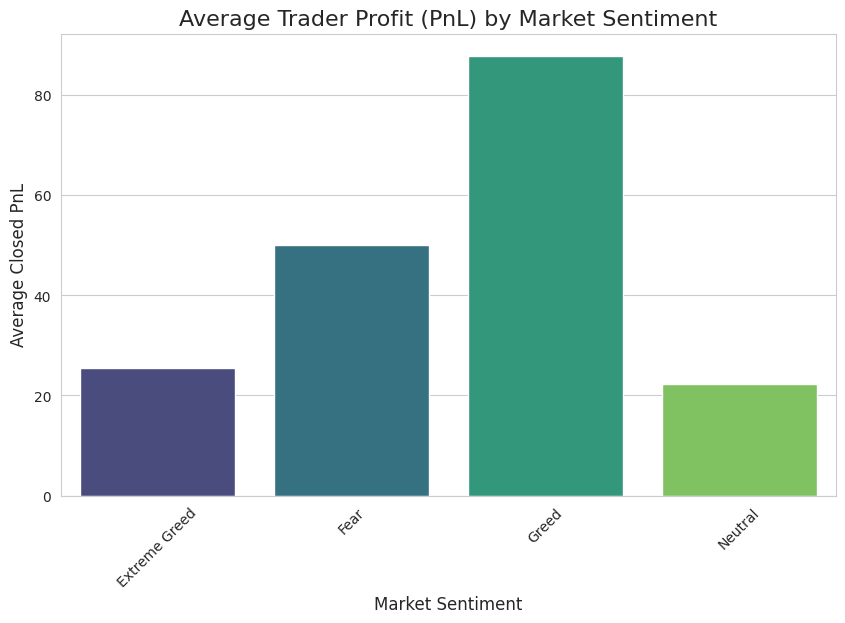

Saved plot to: /content/drive/MyDrive/ds_Krishna_Chaudhari/outputs/average_volume_by_sentiment.png


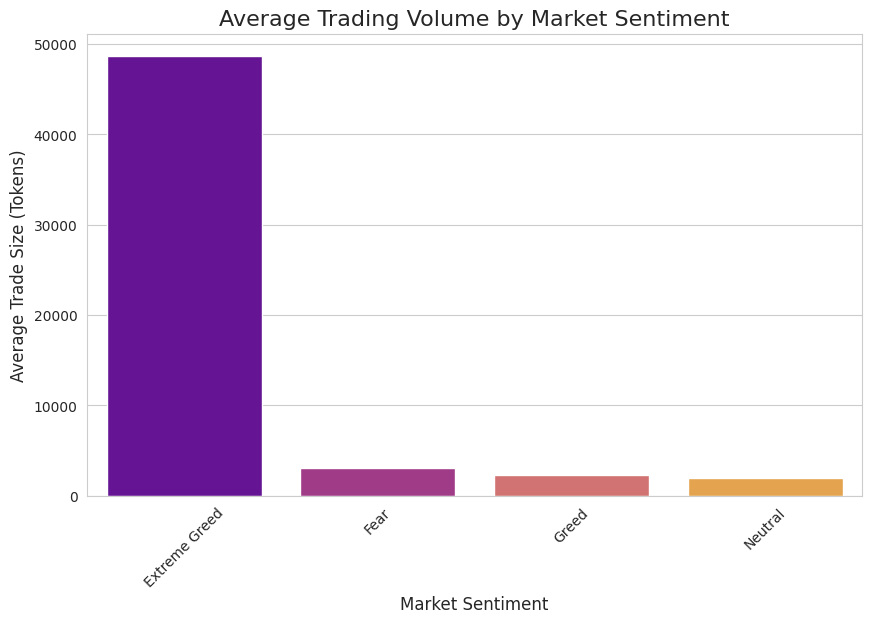

In [17]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

project_path = '/content/drive/MyDrive/ds_Krishna_Chaudhari/'
outputs_path = os.path.join(project_path, 'outputs')
os.makedirs(outputs_path, exist_ok=True)

# Set a style for the plots
sns.set_style("whitegrid")

# 1. Bar Chart for Average PnL
plt.figure(figsize=(10, 6))
sns.barplot(x=average_pnl.index, y=average_pnl.values, hue=average_pnl.index, palette='viridis', legend=False)
plt.title('Average Trader Profit (PnL) by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Closed PnL', fontsize=12)
plt.xticks(rotation=45)

pnl_plot_path = os.path.join(outputs_path, 'average_pnl_by_sentiment.png')
plt.savefig(pnl_plot_path)
print(f"Saved plot to: {pnl_plot_path}")
plt.show()

# 2. Bar Chart for Average Trading Volume
plt.figure(figsize=(10, 6))
sns.barplot(x=average_volume.index, y=average_volume.values, hue=average_volume.index, palette='plasma', legend=False)
plt.title('Average Trading Volume by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Trade Size (Tokens)', fontsize=12)
plt.xticks(rotation=45)

volume_plot_path = os.path.join(outputs_path, 'average_volume_by_sentiment.png')
plt.savefig(volume_plot_path)
print(f"Saved plot to: {volume_plot_path}")
plt.show()